In [ ]:
#Imports the neccessary libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print(df.head())



   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [ ]:
#drop the colums that are irrelavant and could also cause bias
#the decision to drop the columns can be found in our 'Data Description' in the report

df = df.drop(columns=['CustomerID', 'Gender', 'Country', 'State', 'City', 'Zip Code',
                      'Lat Long', 'Latitude', 'Longitude', 'Churn Label',
                      'Churn Score', 'CLTV'])
#The output will show a count for missing values for every colums
#This is critical for the data quality


print(df.isnull().sum())

# Remove rows where Total Charges is empty (data cleaning step)
df = df[df['Total Charges'] != " "]

#data type conversion
#convert the key features to a numeric data type, like float or int.
#his is necessary because "Total Charges" was read as string because of the space character
# Convert to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'])
df['Monthly Charges'] = pd.to_numeric(df['Monthly Charges'])

Count                   0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Value             0
Churn Reason         5174
dtype: int64


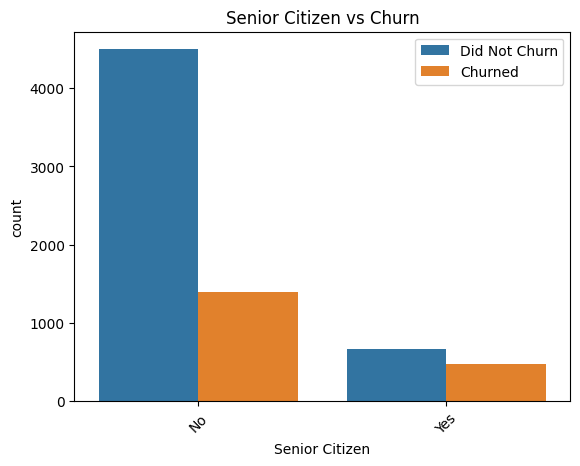

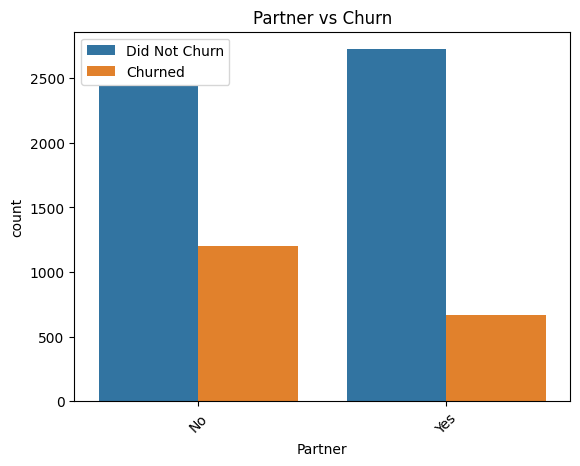

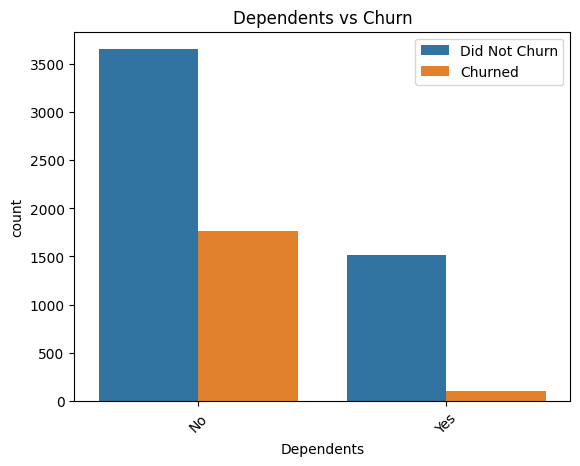

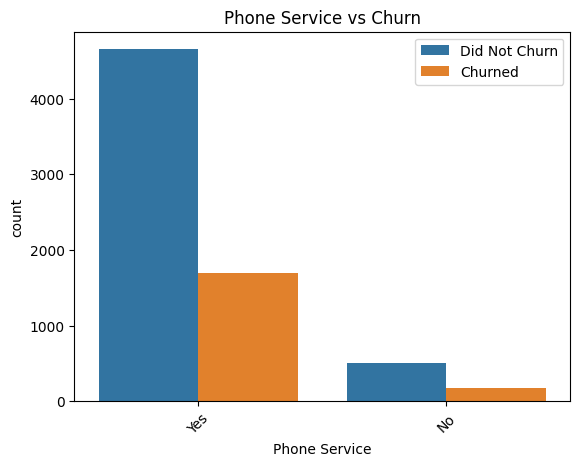

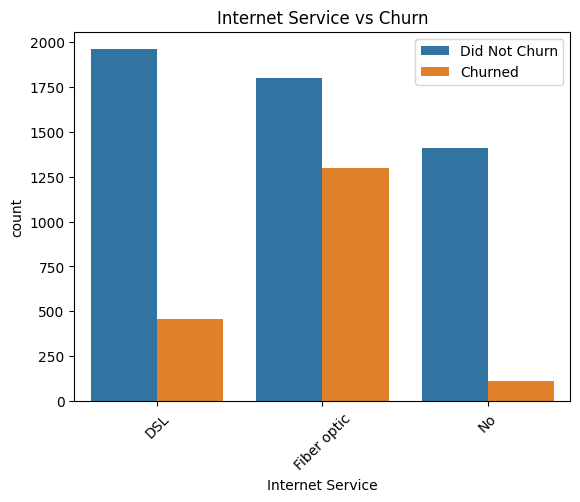

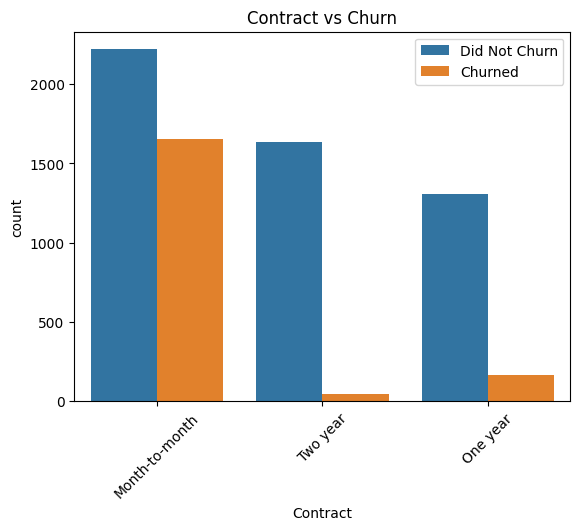

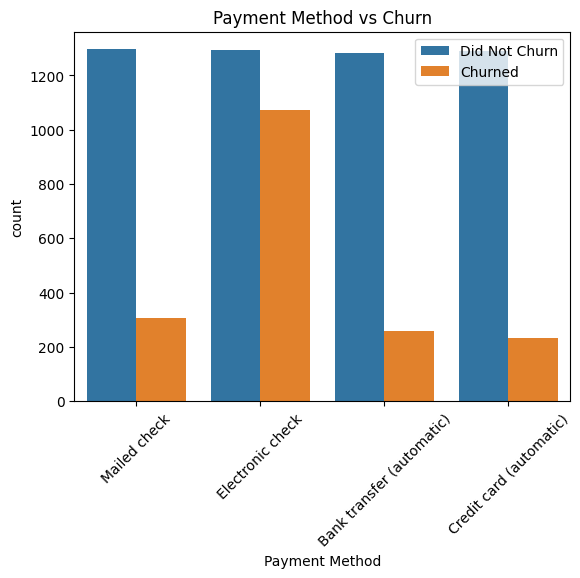

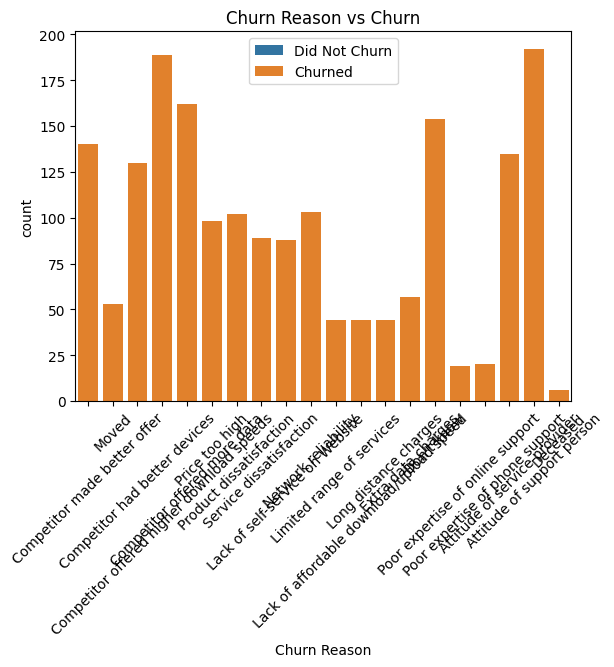

In [ ]:
import matplotlib.pyplot as plt #import visualization libraries
import seaborn as sns #library built on matplotlib for attractive statistics


#the columns are chosen because they represent key customer attributes that could influence churn
categorical_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Internet Service', 'Contract', 'Payment Method', "Churn Reason"] #list of categorical colums we want to visualize against churn

#loop through the selected categorical feature to create visualizations
for col in categorical_cols: #loops through each categorical feature
    sns.countplot(x=col, hue='Churn Value', data=df) #add the title
    plt.title(f"{col} vs Churn")
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ["Did Not Churn", "Churned"])
    plt.xticks(rotation=45)
    plt.show() #prints and generates our chart

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

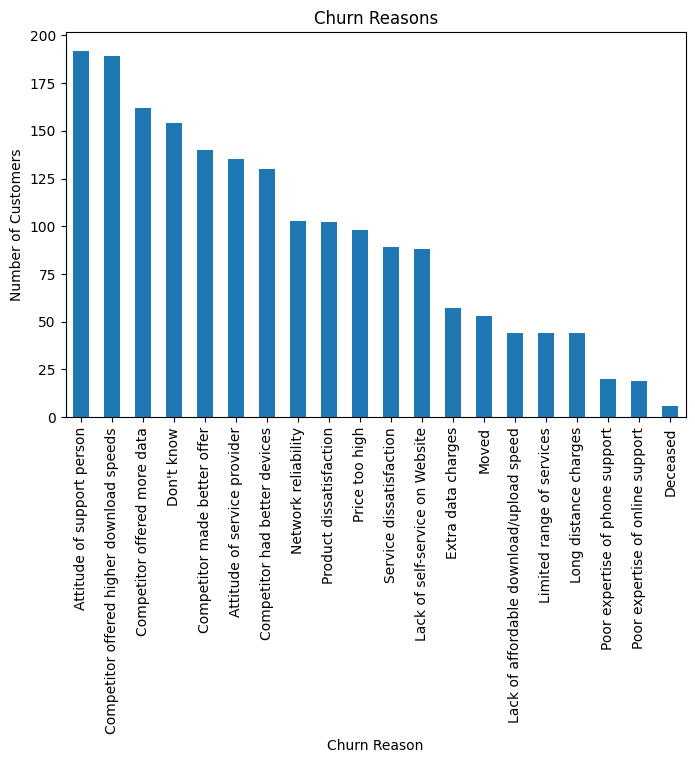

In [ ]:
churned = df[df['Churn Value'] == 1]

# Count how many churned for each reason, filters the DATAFRAME to include the customers who churned
churn_reason_counts = churned['Churn Reason'].value_counts()
print(churn_reason_counts)

# Visualize the churn reasons using a bar chart
# kind = specifies a bar plot
# figsize = set the dimensions of the output plot to make it more clear
# title- just adds the title
churn_reason_counts.plot(kind='bar', figsize=(8,5), title="Churn Reasons")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
features = ["Partner","Dependents",
            "Tenure Months","Phone Service","Multiple Lines",
            "Internet Service","Online Security","Online Backup",
            "Device Protection","Tech Support","Streaming TV",
            "Streaming Movies","Contract","Paperless Billing",
            "Payment Method","Monthly Charges","Total Charges"]

#defines the final list of feature columns
#The list information and description corresponds to the colums after initial dropping.

X = df[features]  # select columns using a list of names
y = df["Churn Value"]
df = df.drop(columns=['Churn Value', 'Churn Reason'])



In [ ]:

#Split to test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#categorical feature encoding #iterate through all columns
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

num_cols = X_train.select_dtypes(include='number').columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
lr_classifier = LogisticRegression(solver='lbfgs', max_iter=10000) #creates a logistic regression classifier
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, #creates an MLP (Neutral Network) classifer
                               hidden_layer_sizes=(8,2), random_state=11, max_iter=10000) #neutral network strcu


In [ ]:
lr_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)

#logistic regresiion and initialized the train LR classifier



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=10000,
              random_state=11, solver='lbfgs')

In [ ]:
y_pred_lr = lr_classifier.predict(X_test) #make predicitions on the test set for both models
y_pred_mlp = mlp_classifier.predict(X_test) #use the trained models to predict its 'Churn Value'

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))


Logistic Regression Accuracy: 0.8031272210376688
MLP Classifier Accuracy: 0.7896233120113717


In [ ]:
def encode_new_data(df_new, X_original):
    for col in df_new.select_dtypes(include='object').columns:
        le = LabelEncoder()
        le.fit(X_original[col].astype(str))
        df_new[col] = le.transform(df_new[col].astype(str))
    return df_new

def predict_churn(customer_data):
    df_new = pd.DataFrame([customer_data])
    df_new = encode_new_data(df_new, X)
    df_new[num_cols] = scaler.transform(df_new[num_cols])

    #prediction
    lr_pred = lr_classifier.predict(df_new)[0]
    mlp_pred = mlp_classifier.predict(df_new)[0]

    return {"Logistic Regression Prediction": "Churn" if lr_pred==1 else "Not Churn",
        "MLP Prediction": "Churn" if mlp_pred==1 else "Not Churn"}

In [ ]:
#DEMO
#TIP- Edit dependents, tenure months, contract, or monthly charges to change churn prediction
sample_customer = {
    "Partner": "Yes",
    "Dependents": "Yes",
    "Tenure Months": 24,
    "Phone Service": "Yes",
    "Multiple Lines": "No",
    "Internet Service": "Fiber optic",
    "Online Security": "No",
    "Online Backup": "No",
    "Device Protection": "Yes",
    "Tech Support": "No",
    "Streaming TV": "Yes",
    "Streaming Movies": "Yes",
    "Contract": "Month-to-month",
    "Paperless Billing": "Yes",
    "Payment Method": "Credit card (automatic)",
    "Monthly Charges": -5.30,
    "Total Charges": 400.50,
}

print(predict_churn(sample_customer))


{'Logistic Regression Prediction': 'Not Churn', 'MLP Prediction': 'Not Churn'}
